# Image Filtering


Dalam tugas Image Filtering ini, diberikan 3 citra ultrasonik untuk dibersihkan dari komponen-komponen yang tidak diperlukan sehingga didapatkan citra ultrasonik sepenuhnya (tanpa tulisan atau objek lainnya).
Berikut citra yang akan diproses. 
<br/>
<img src="img (1).png">
<img src="img (2).png">
<img src="img (3).png">


Langkah pertama adalah memuat ketiga citra tersebut. Setelah citra dimuat, citra RGB diubah ke bentuk citra grayscale.

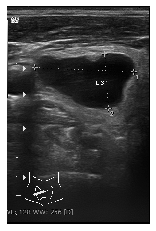

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

imgs = [cv2.cvtColor(cv2.imread('img (1).png'),cv2.COLOR_RGB2GRAY),
        cv2.cvtColor(cv2.imread('img (2).png'),cv2.COLOR_RGB2GRAY),
        cv2.cvtColor(cv2.imread('img (3).png'),cv2.COLOR_RGB2GRAY)]
plt.axis(False)
plt.imshow(imgs[0],cmap='gray')

Citra di atas merupakan salah satu contoh citra yang dimuat dan diubah ke citra grayscale.

Langkah selanjutnya adalah image filtering. Filter citra digunakan untuk menghilangkan beberapa hal yang tidak diperlukan digambar seperti garis, gambar wajah di sudut gambar, dan bagian yang lain. Langkah kerja filter adalah sebagai berikut.
<br/>
<br/>
1. Mendeteksi titik (spot) pada gambar, kemudian memetakan titik-titik yang terdeteksi menjadi citra baru. <br/>
2. Melakukan operasi pengurangan citra. Citra masukkan dikurangi citra hasil pemetaan titik. <br/>
3. Menghaluskan citra dengan Median Filter.<br/>
<br/>
Berikut merupakan fungsi untuk melakukan image filtering tersebut

In [39]:
def filter_image(img):
    img_proc = img.copy()
    spot_kernel = np.array([(-1,-1,-1),(-1,8,-1),(-1,-1,-1)])
    spot_img = cv2.filter2D(img_proc,-1,spot_kernel)
    reduced_img = cv2.subtract(img,spot_img)
    median_img = cv2.medianBlur(reduced_img,11)
    return img, spot_img, reduced_img, median_img

Langkah selanjutnya adalah menerapkan fungsi tersebut untuk memfilter citra masukkan di awal. Di bawah ini merupakan fungsi untuk menampilkan perbandingan citra tiap langkahnya.

In [44]:
def show_images(imgs):
    img,spot,red,med = imgs
    plt.subplot(1,4,1)
    plt.title('citra awal')
    plt.axis(False)
    plt.imshow(img,cmap='gray')
    plt.subplot(1,4,2)
    plt.title('citra spot')
    plt.axis(False)
    plt.imshow(spot,cmap='gray')
    plt.subplot(1,4,3)
    plt.title('substract')
    plt.axis(False)
    plt.imshow(red,cmap='gray')
    plt.subplot(1,4,4)
    plt.title('median filter')
    plt.axis(False)
    plt.imshow(med,cmap='gray')




Berikut merupakan hasil filter citra.

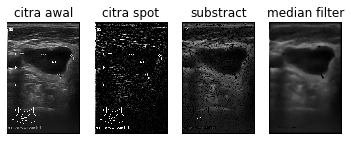

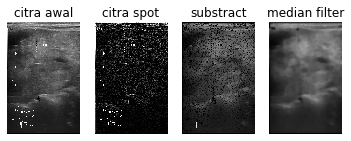

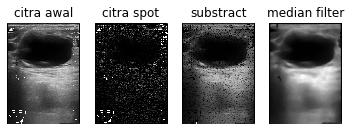

In [46]:
for i in imgs:
    plt.figure()
    show_images(filter_image(i))